# **Question 1) Autoencoder**

Instructions: *A convolutional autoencoder is a particular flavor of autoencoder where we
use convolutional layers instead of dense layers. We have previously applied
autoencoders to images using only Dense layers and the result worked fairly
well. However, the local spatial correlations of images imply that we should be
able to do better using convolutional layers instead of Dense layers.*

*Build and fit a convolutional autoencoder for the Fashion MNIST dataset.
The components of this network will be many of the same pieces we’ve used
with convolutional classification networks: Conv2D, MaxPooling, and so on.
The encoder part of the network should run the input image through a few
convolutional layers of your choice. The decoder part of the network will utilize
UpSampling2D to get the representation back to the original image size.*

*An example to guide your thinking can be found toward the bottom of this
post https://blog.keras.io/building-autoencoders-in-keras.html.
After training your network, visualize some examples of input images and
their decoded reconstruction.*

In [48]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import fashion_mnist
import numpy as np
from keras.utils import np_utils
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

**Load in the Fashion MNIST dataset into our training and testing sets.**

In [49]:
#Load in the Fashion MNIST dataset into our training and testing sets.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [50]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)


In [51]:
#Reshape the images so that they're 28x28 and are using 1 channel, which is black and white.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [52]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (60000, 28, 28, 1)
X_test.shape: (10000, 28, 28, 1)


In [53]:
#Normalize the images.
X_train /= 255
X_test /= 255

#One-hot encode the labels.
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

**Add the layers to be used for our autoencoder.**

In [54]:
#Adding input layer.
input_layer = Input(shape=(28, 28, 1)) 

#Building our encoding layer. 
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#Building our decoding layer.
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoding_layer = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

**Creating our autoencoder which will map the input to its decoded representation.**


In [55]:
#Creating our autoencoder which will map the input to its decoded representation.
autoencoder = Model(input_layer, decoding_layer)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [56]:
autoencoder.fit(X_train, X_train, epochs=30, batch_size=128, shuffle=True, validation_data=(X_test, X_test), callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 51s 852us/step - loss: 0.3828 - val_loss: 0.3455
Epoch 2/30
60000/60000 [==============================] - 49s 818us/step - loss: 0.3289 - val_loss: 0.3187
Epoch 3/30
60000/60000 [==============================] - 49s 813us/step - loss: 0.3161 - val_loss: 0.3154
Epoch 4/30
60000/60000 [==============================] - 48s 801us/step - loss: 0.3100 - val_loss: 0.3087
Epoch 5/30
60000/60000 [==============================] - 48s 799us/step - loss: 0.3066 - val_loss: 0.3046
Epoch 6/30
60000/60000 [==============================] - 47s 791us/step - loss: 0.3041 - val_loss: 0.3080
Epoch 7/30
60000/60000 [==============================] - 47s 785us/step - loss: 0.3022 - val_loss: 0.3027
Epoch 8/30
60000/60000 [==============================] - 46s 769us/step - loss: 0.3006 - val_loss: 0.3023
Epoch 9/30
60000/60000 [==============================] - 49s 813us/step - loss: 0.2991 - val_

**Now, we will visualize six input images and their reconstructed representations.**

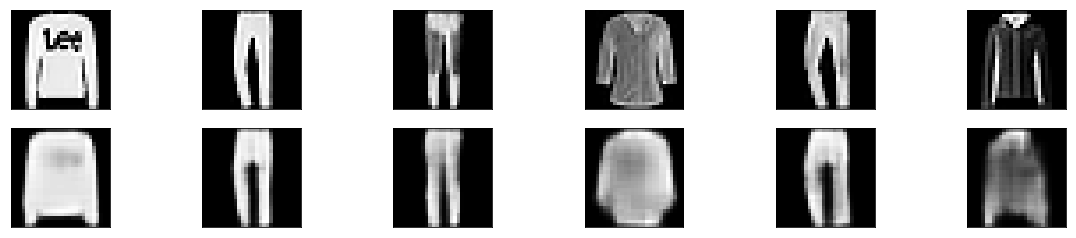

In [65]:
#Now, we will visualize the input images and their reconstructed representation.
decoded_images = autoencoder.predict(X_test)

n = 6 #visualize 6 images. 
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # display original images. 
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display lossy reconstructed images. 
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show() #display the images. 